In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 
from graph_tool.all import *
import json
tqdm.pandas()
from IPython.display import Image

In [2]:
def tweet_ID_to_User(ID_dict, ID):
    """
    Function to return the user name from Tweeter user ID
    using the ID_dictionary; 
    Returns NaN if the user is not found
    """
    try:
        return ID_dict[ID]
    except:
        return np.nan

#### Considering the TELSA stock for month of Dec-2020

In [5]:
df_tweets = pd.read_json('./TSLA/TSLA-2020-Dec.json', lines=True)
df_tweets.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/BillyBoen/status/134443305...,2020-12-30 23:59:52+00:00,"Di penghujung 2020, $tsla 695!\n\nSkg market c...","Di penghujung 2020, $tsla 695!\n\nSkg market c...",1344433053481910277,"{'username': 'BillyBoen', 'displayname': 'BILL...",[],[],2,1,...,1,1344433053481910277,in,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
1,https://twitter.com/HausFeed/status/1344433050...,2020-12-30 23:59:52+00:00,@slye Started investing in $tsla.,@slye Started investing in $tsla.,1344433050051108865,"{'username': 'HausFeed', 'displayname': 'TheHa...",[],[],0,0,...,0,1344270630506688513,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,"[{'username': 'slye', 'displayname': 'Andy Sly..."
2,https://twitter.com/TrueBubbleHead/status/1344...,2020-12-30 23:59:33+00:00,$TSLA-aaaaaa! https://t.co/bbJ7G97omU,$TSLA-aaaaaa! https://t.co/bbJ7G97omU,1344432971441451008,"{'username': 'TrueBubbleHead', 'displayname': ...",[],[],0,0,...,0,1344432971441451008,ht,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
3,https://twitter.com/JJLuo3/status/134443267089...,2020-12-30 23:58:21+00:00,A compromise choice: $tsla https://t.co/V2SPj5...,A compromise choice: $tsla twitter.com/RevShar...,1344432670898610177,"{'username': 'JJLuo3', 'displayname': 'Jackie_...",[https://twitter.com/RevShark/status/134439695...,[https://t.co/V2SPj5Qcgk],0,0,...,0,1344432670898610177,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,{'url': 'https://twitter.com/RevShark/status/1...,None
4,https://twitter.com/MFHoz/status/1344432560454...,2020-12-30 23:57:55+00:00,Someone wrote something good on stocktwits:\n\...,Someone wrote something good on stocktwits:\n\...,1344432560454176775,"{'username': 'MFHoz', 'displayname': 'Hoz', 'i...",[],[],3,1,...,0,1344432560454176775,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,None,NaN,None,None


In [30]:
# Features available to us in the scraped tweets
df_tweets.columns.values

array(['url', 'date', 'content', 'renderedContent', 'id', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'conversationId', 'lang', 'source',
       'sourceUrl', 'sourceLabel', 'media', 'retweetedTweet',
       'quotedTweet', 'mentionedUsers'], dtype=object)

##### Tweet ID is a ID of a given tweet; Conversation ID is the Tweet ID to the original tweet; Replies to a tweet will have different Tweet ID and Conversation ID; Unfortunately Retweets are not scrapped by the API infrastructure at hand

In [15]:
# Selecting a subset of the data to extract and store the Tweets author/originator name
df_IDs_Users_Tweetsid = df_tweets[['id','user','conversationId']]

# Converting the Tweet ID and Conversation ID to string type
df_IDs_Users_Tweetsid.loc[:,'id'] = df_IDs_Users_Tweetsid.loc[:,'id'].astype(str)
df_IDs_Users_Tweetsid.loc[:,'conversationId'] = df_IDs_Users_Tweetsid.loc[:,'conversationId'].astype(str)

# Extracting the user name and storing it under username 
df_IDs_Users_Tweetsid.loc[:,'user_name'] = df_IDs_Users_Tweetsid.loc[:,'user'].apply(lambda user_dict: user_dict['username'])

df_IDs_Users_Tweetsid.head()

/opt/conda/envs/graph/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/envs/graph/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,id,user,conversationId,user_name
0,1344433053481910277,"{'username': 'BillyBoen', 'displayname': 'BILL...",1344433053481910277,BillyBoen
1,1344433050051108865,"{'username': 'HausFeed', 'displayname': 'TheHa...",1344270630506688513,HausFeed
2,1344432971441451008,"{'username': 'TrueBubbleHead', 'displayname': ...",1344432971441451008,TrueBubbleHead
3,1344432670898610177,"{'username': 'JJLuo3', 'displayname': 'Jackie_...",1344432670898610177,JJLuo3
4,1344432560454176775,"{'username': 'MFHoz', 'displayname': 'Hoz', 'i...",1344432560454176775,MFHoz


In [23]:
# Extracting User_names and tweetIDs seperately as a list
user_list = list(df_IDs_Users_Tweetsid['user_name'].values)
tweets_ID_list = list(df_IDs_Users_Tweetsid['id'].astype(str).values)

# Constructing a dictionary of tweet IDs and user names
dict_tweetsid_username = {}
for i in range(len(user_list)):
    dict_tweetsid_username[tweets_ID_list[i]] = user_list[i]

# Extracting and storing the tweets originators/ orginal authors
df_IDs_Users_Tweetsid.loc[:,'tweet_author'] = df_IDs_Users_Tweetsid.loc[:,'conversationId'].progress_apply(lambda conversationId: tweet_ID_to_User(dict_tweetsid_username, conversationId))

# Removing NaN containing rows
df_IDs_Users_Tweetsid = df_IDs_Users_Tweetsid.dropna(how='any', axis=0).reset_index(drop=True)

# Capturing the unique users list
unique_user = list(np.unique(df_IDs_Users_Tweetsid.user_name))

df_IDs_Users_Tweetsid.head()

100%|██████████| 107124/107124 [00:00<00:00, 667638.39it/s]


,id,user,conversationId,user_name,tweet_author
0,1344433053481910277,"{'username': 'BillyBoen', 'displayname': 'BILL...",1344433053481910277,BillyBoen,BillyBoen
1,1344432971441451008,"{'username': 'TrueBubbleHead', 'displayname': ...",1344432971441451008,TrueBubbleHead,TrueBubbleHead
2,1344432670898610177,"{'username': 'JJLuo3', 'displayname': 'Jackie_...",1344432670898610177,JJLuo3,JJLuo3
3,1344432560454176775,"{'username': 'MFHoz', 'displayname': 'Hoz', 'i...",1344432560454176775,MFHoz,MFHoz
4,1344432485623586816,"{'username': 'Darksta22213574', 'displayname':...",1344432485623586816,Darksta22213574,Darksta22213574


In [25]:
# Forming a matrix of # of unique_users x # of unique_users
matrix = np.zeros((len(unique_user),len(unique_user)))

# Accounting the tweet interactions from the original authors and replying audience
for i in tqdm(range(df_IDs_Users_Tweetsid.shape[0])):
    try:
        matrix[unique_user.index(df_IDs_Users_Tweetsid.loc[i,'tweet_author']), unique_user.index(df_IDs_Users_Tweetsid.loc[i,'user_name'])] += 1
    except:
        pass

100%|██████████| 107124/107124 [01:55<00:00, 924.97it/s] 


In [34]:
# number of interaction between 2 different people
np.sum(matrix - np.diag(np.diag(matrix)))

8615.0

##### Graph Construction

In [37]:
# Graph Library object instantiation
g1 = Graph()

# Dict to store the vertices for all the unique users
dict_vertex = {}
for user in unique_user:
    dict_vertex[user] = g1.add_vertex()

# Removing duplicate entries of tweets/tweet_replies
dict_edges = {}
df_IDs_Users_Tweets_unique = df_IDs_Users_Tweetsid.drop_duplicates(subset=['user_name','tweet_author'], keep='first').reset_index(drop=True)

for i in range(df_IDs_Users_Tweets_unique.shape[0]):
    
    # Neglecting the initial tweets where the originator or original author makes the tweets
    if df_IDs_Users_Tweets_unique.loc[i,'user_name'] != df_IDs_Users_Tweets_unique.loc[i,'tweet_author']:
        dict_edges[i] = g1.add_edge(dict_vertex[df_IDs_Users_Tweets_unique.loc[i,'user_name']], dict_vertex[df_IDs_Users_Tweets_unique.loc[i,'tweet_author']])


##### A few words on the graph construction methodology: Our graph is a directed but un-weighted graph. We apply the arrow direction in the direction the attention flow i.e. if A is replying to B, then the arrow goes from A to B. The top influencers would have large number of arrows directed towards him. This is consistent with the "PageRank" system where a webpage is ranked according to the number of hyperlinks directed toward it. Thus, we will use the "PageRank" centrality measure to identify the most influencial users of our network. 

#### Graph View

In [39]:
GraphView(g1, directed=True);

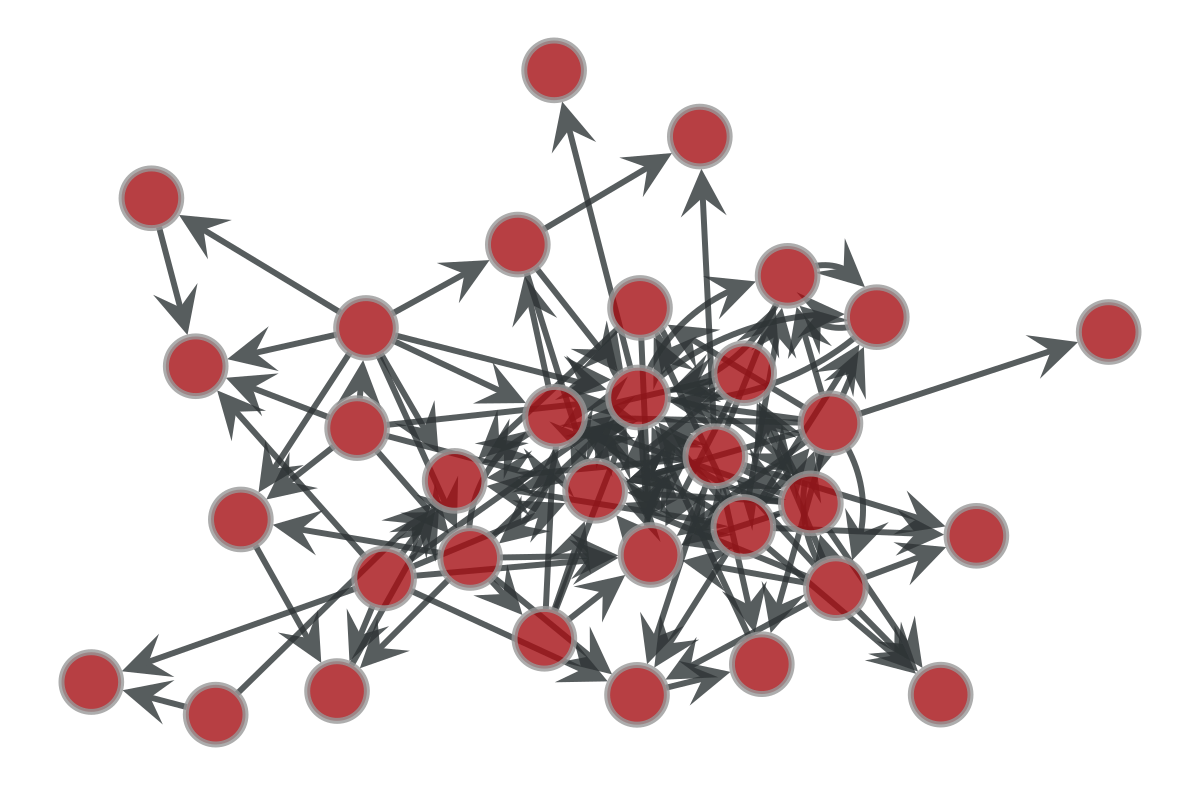

In [76]:
u = GraphView(g1, vfilt=lambda v: (v.out_degree() + v.in_degree()) > 30)
graph_draw(u);

In [74]:
# PageRank Centrality measure
pr = pagerank(g1)

# Sorting the most influencial users
df_page_rank = pd.DataFrame(list(pr.a), columns = ['page_rank score'], index = unique_user).sort_values(ascending= False, by='page_rank score')
df_page_rank.head(10)

,page_rank score
garyblack00,0.022009
squawksquare,0.016479
SawyerMerritt,0.012276
stevenmarkryan,0.011087
GerberKawasaki,0.007137
28delayslater,0.005838
vincent13031925,0.005733
ICannot_Enough,0.005487
tradingview,0.005326
ChrisDungeon,0.003874


##### As sanity check, we checked twitter accounts of the most influential people displayed above. Each of them is very active and has tens of thousands followers. Ex @garyblack00: Gary Black, Former CEO Aegon Asset Management, CIO Equities Goldman Sachs. @GerberKawasaki: Ross Gerber, Co founder & CEO Investment Advisor. @SawyerMerritt: Sawyer Merritt: Co Founder of Twin Birch, clothing accessories and Tesla investor since 2015.

##### Both the construction methodology and the centrality measure seem to be reliable to identify the most important users of our network. 

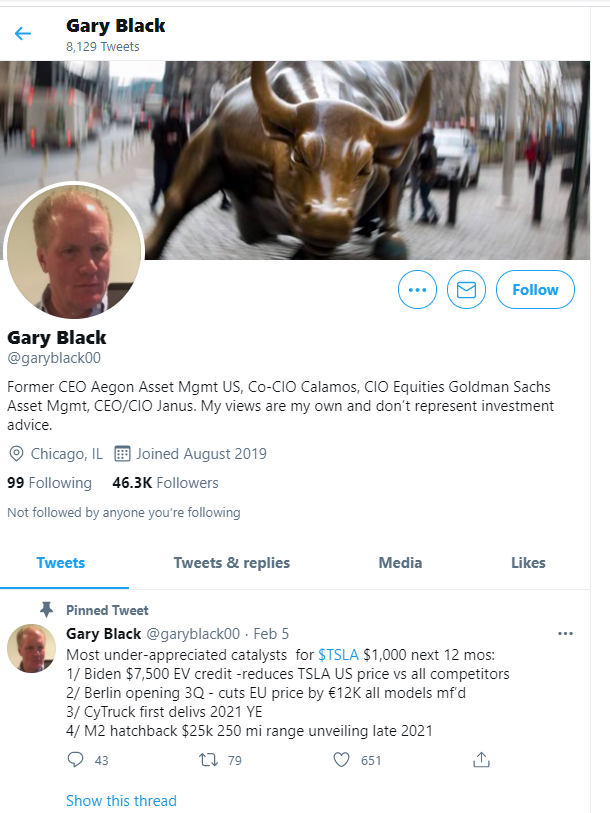

In [71]:
Image("./Influencer_Images/Gary_Black_Tesla.PNG") 

#### Further directions to leverage the network:

#### Aggregate the network in a 3 month rolling window where the step size is 1 month. This way we can prevent having too less tweets for less followed stocks

#### Probable Directions:
#### 1) Use network structure, weighted average of centrality measure concentration in top 'x' influencers and test it as a factor to see it can help explain returns on top benchmark models like CAPM, Fama French 3, or Fama French Carhart model or Fama French 5 model
##### 1.1) Use changes of the network structure (Say centrality measure concentration in the top 'x' influencer) in a time series & Cross-sectional perspective amongst the stock networks to predict the returns 

#### 2) Measure activity of the top 'x' influencers, say, by # of tweets posted in last 1 day and use it to predict volatility using GARCH or GJR-Garch as benchmark
##### 2.1) Use time series z-score of activity over last 1 day and test it as an additional factor to explain volatility

#### 3) Use the tweets posted by the top 'x' influencers in the last 'y' days to predict the future returns using basic sentiment analysis (logistic regression or basic NLP Algorithm)

#### 4) Half-life analysis of tweets for a given stock using higher frequency data (Say 5mins price data) to check the impact of top influencer tweets

#### 5) Construct a graph of universe of all stocks in cross-section from the commanilities in the top influencers of their respective individual stock networks

#### 6) Run ancillary test of whether the tweeter activity of top influencers in a stock network predict volume trends at higher frequency data (5 min or 1 min time frame data) 
